In [5]:
# Hierarchical clustering algorithm


# importing the module
import pandas as pd
from IPython.display import Image


# importing the dataset
dataset = pd.read_csv('mall_customers.xls')
# dataset 
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
# find how many records and columns (should be (200,5)
dataset.shape

(200, 5)

In [6]:
# give information such as column names, data type, and size
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)  200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [19]:
# describe the dataset: give an idea what the data is saying about frequency, etc.

dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# we take only 2 featurs to classify customers (Income and Spending score)
# on column


# give all rows, start with column 3 to the rest of columns

X = dataset.iloc[:,3:] 
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10

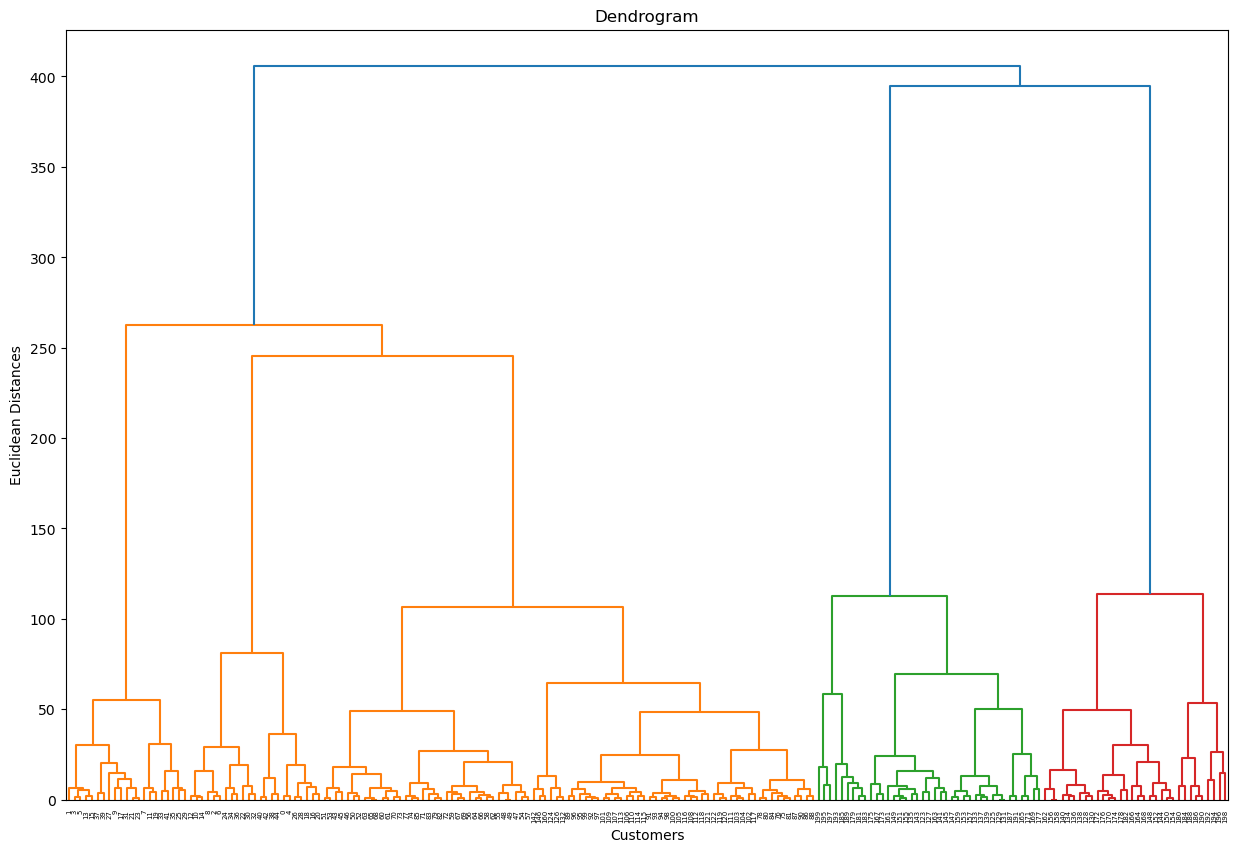

In [9]:
# Using Dendogram to find the optimal number of clusters
dendogram  = hc.dendrogram(hc.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

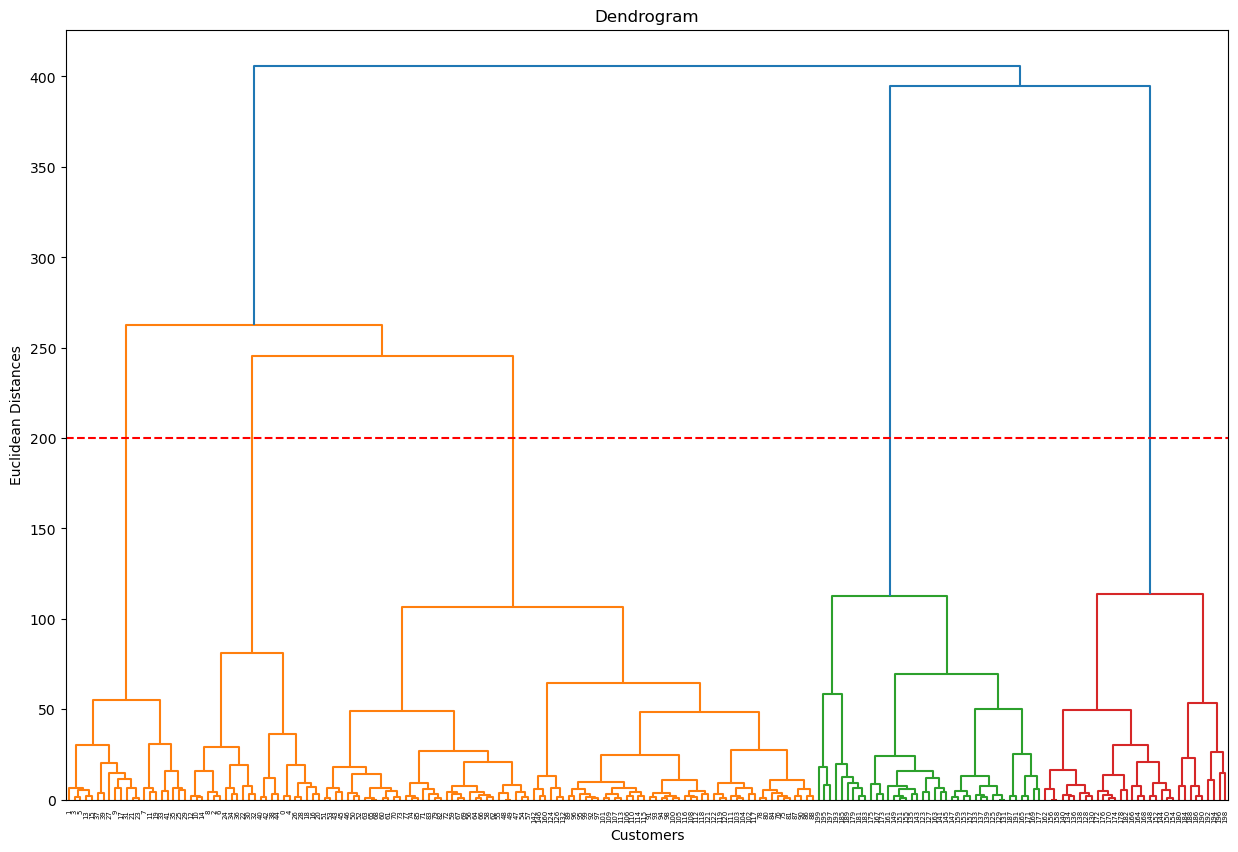

In [29]:
# the horizontal threshold is 200

# the threshold will give how many clusters you will have by couting the vertical line
# here we have 5 clusters.

dendogram  = hc.dendrogram(hc.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(200, c='r', linestyle='--')
plt.show()



In [10]:
# Agglomerative hierarchical Cluster
# starting with single clusters and group them into one final cluster

from sklearn.cluster import AgglomerativeClustering
# number of cluster is given

hc_Agg = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc_Agg.fit_predict(X)


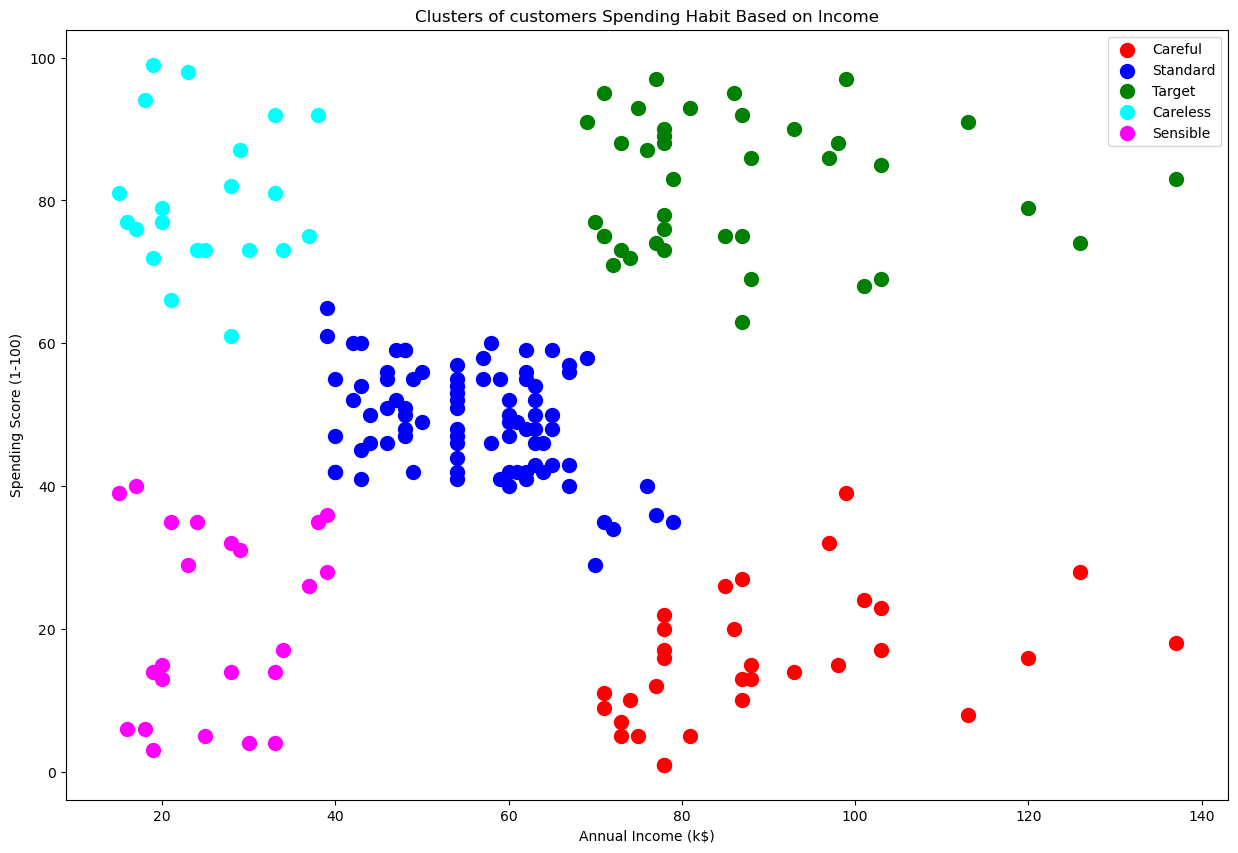

In [12]:
# Visualizing the clusters
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X.iloc[y_hc == 3, 0], X.iloc[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X.iloc[y_hc == 4, 0], X.iloc[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers Spending Habit Based on Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()